## Importing Libraries and Data Set

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/vanessanunezpenas/Documents/Data Analytics Program - CareerFoundry/II Data Immersion 1 - Preparing and Analyzing Data/A4 - Python Fundamentals/2024.01 Instacart Basket Analysis'
path

'/Users/vanessanunezpenas/Documents/Data Analytics Program - CareerFoundry/II Data Immersion 1 - Preparing and Analyzing Data/A4 - Python Fundamentals/2024.01 Instacart Basket Analysis'

In [3]:
orders_products_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
orders_products_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Surname,Gender,State,Age,date_joined,n_dependants,familial_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


## Security implications

This new data contains personal identifiable information (PII): first name and surnanme of every Instacart's customer. We have the user_id for analytical purpose, although a good practice here would be to create a new dataframe with this data and to drop the columns with PII in the orders_products_all dataframe.

In [5]:
customers_pii = orders_products_all[['user_id', 'First Name', 'Surname']].copy()

In [6]:
customers_pii.head()

,user_id,First Name,Surname
0,1,Linda,Nguyen
1,1,Linda,Nguyen
2,1,Linda,Nguyen
3,1,Linda,Nguyen
4,1,Linda,Nguyen


In [7]:
orders_products_all = orders_products_all.drop(['First Name', 'Surname'], axis = 1)

In [8]:
orders_products_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,frequency_flag,Gender,State,Age,date_joined,n_dependants,familial_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


## Regional segmentation of the data

In [9]:
# Assigning states to Northeast Region

orders_products_all.loc[orders_products_all['State'].isin(['Maine',
                                                         'New Hampshire',
                                                         'Vermont',
                                                         'Massachusetts',
                                                         'Rhode Island',
                                                         'Connecticut',
                                                         'New York',
                                                         'Pennsylvania',
                                                         'New Jersey']),
                        'region'] = 'Northeast'

In [10]:
# Assigning states to Midwest Region

orders_products_all.loc[orders_products_all['State'].isin(['Wisconsin',
                                                          'Michigan',
                                                          'Illinois',
                                                          'Indiana',
                                                          'Ohio',
                                                          'North Dakota',
                                                          'South Dakota',
                                                          'Nebraska',
                                                          'Kansas',
                                                          'Minnesota',
                                                          'Iowa',
                                                          'Missouri']),
                        'region'] = 'Midwest'

In [11]:
# Assigning states to South Region

orders_products_all.loc[orders_products_all['State'].isin(['Delaware',
                                                          'Maryland',
                                                          'District of Columbia',
                                                          'Virginia',
                                                          'West Virginia',
                                                          'North Carolina',
                                                          'South Carolina',
                                                          'Georgia',
                                                          'Florida',
                                                          'Kentucky',
                                                          'Tennessee',
                                                          'Mississippi',
                                                          'Oklahoma',
                                                          'Alabama',
                                                          'Texas',
                                                          'Arkansas',
                                                          'Louisiana']),
                        'region'] = 'South'

In [12]:
# Assigning states to West Region

orders_products_all.loc[orders_products_all['State'].isin(['Idaho',
                                                          'Montana',
                                                          'Wyoming',
                                                          'Nevada',
                                                          'Utah',
                                                          'Colorado',
                                                          'Arizona',
                                                          'New Mexico',
                                                          'Alaska',
                                                          'Washington',
                                                          'Oregon',
                                                          'California',
                                                          'Hawaii']),
                        'region'] = 'West'

In [13]:
orders_products_all.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,Gender,State,Age,date_joined,n_dependants,familial_status,income,_merge,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [14]:
orders_products_all['region'].value_counts(dropna = False)

region
South        10792300
West          8293217
Midwest       7597585
Northeast     5722939
Name: count, dtype: int64

In [15]:
# Crossing the the variables 'region' and 'spending_flag'

regional_spending = orders_products_all[['region', 'spending_flag']].value_counts()

In [16]:
regional_spending

region     spending_flag
South      Low spender      10582607
West       Low spender       8132863
Midwest    Low spender       7441606
Northeast  Low spender       5614713
South      High spender       209693
West       High spender       160354
Midwest    High spender       155979
Northeast  High spender       108226
Name: count, dtype: int64

In [17]:
# Converting the Series into a DataFrame for further analyses

regional_spending_df = regional_spending.reset_index(name='count')

In [18]:
regional_spending_df

,region,spending_flag,count
0,South,Low spender,10582607
1,West,Low spender,8132863
2,Midwest,Low spender,7441606
3,Northeast,Low spender,5614713
4,South,High spender,209693
5,West,High spender,160354
6,Midwest,High spender,155979
7,Northeast,High spender,108226


Text(0, 0.5, 'Count')

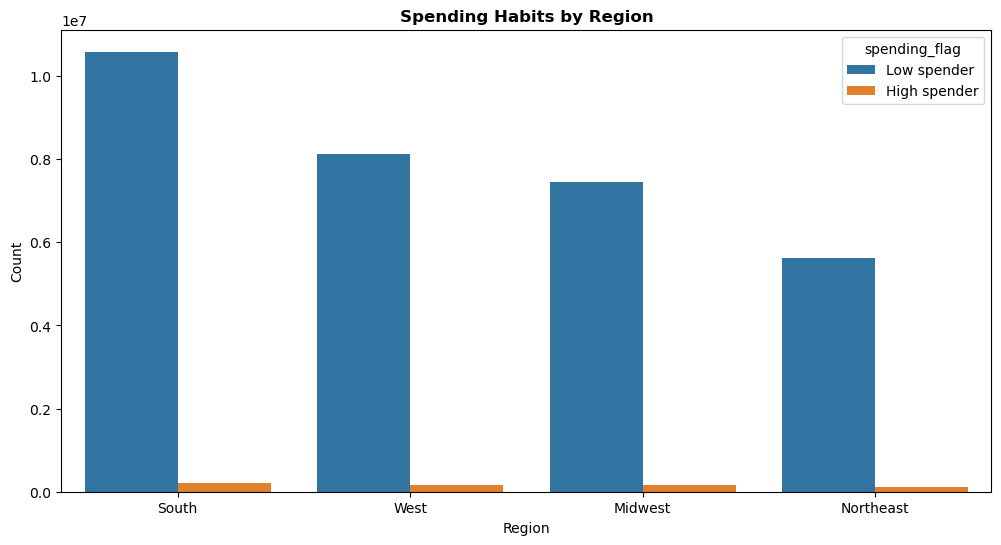

In [19]:
plt.figure(figsize=(12, 6))
regional_spending_habits = sns.barplot(data=regional_spending_df, x='region', y='count', hue='spending_flag')
plt.title('Spending Habits by Region', fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Count')

In [20]:
regional_spending_habits.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regional_spending_habits.png'))

## Exclusion flag for low-activity customers

In [21]:
orders_products_all['max_order'] = orders_products_all.groupby(['user_id'])['order_number'].transform(np.max)

In [22]:
orders_products_all.loc[orders_products_all['max_order'] < 5, 'activity_flag'] = 'Low-activity customer'

In [23]:
orders_products_all.loc[orders_products_all['max_order'] >= 5, 'activity_flag'] = 'More than 5 orders customer'

In [24]:
low_activity_customers = orders_products_all[orders_products_all['activity_flag'] == 'Low-activity customer']

In [25]:
low_activity_customers

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,State,Age,date_joined,n_dependants,familial_status,income,_merge,region,max_order,activity_flag
1510,520620,120,1,3,11,NaN,196,2,0,Soda,...,Kentucky,54,3/2/2017,2,married,99219,both,South,3,Low-activity customer
1511,3273029,120,3,2,8,19.0,196,2,1,Soda,...,Kentucky,54,3/2/2017,2,married,99219,both,South,3,Low-activity customer
1512,520620,120,1,3,11,NaN,46149,1,0,Zero Calorie Cola,...,Kentucky,54,3/2/2017,2,married,99219,both,South,3,Low-activity customer
1513,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,...,Kentucky,54,3/2/2017,2,married,99219,both,South,3,Low-activity customer
1514,520620,120,1,3,11,NaN,26348,3,0,Mixed Fruit Fruit Snacks,...,Kentucky,54,3/2/2017,2,married,99219,both,South,3,Low-activity customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32406010,1947537,166751,3,4,7,0.0,49001,1,1,Melatonin 2.5 Mg Sublingual Orange Tablets,...,Oregon,38,8/17/2018,1,married,41766,both,West,3,Low-activity customer
32406037,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,...,Tennessee,22,9/12/2017,3,married,46151,both,South,4,Low-activity customer
32406038,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Tennessee,22,9/12/2017,3,married,46151,both,South,4,Low-activity customer
32406039,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Tennessee,22,9/12/2017,3,married,46151,both,South,4,Low-activity customer


In [26]:
low_activity_customers.shape

(1440355, 31)

In [27]:
low_activity_customers.to_csv(os.path.join(path, '02 Data','Prepared Data', 'low_activity_customers.csv'))

In [28]:
# Excluding the Low-activity customers from the data

orders_products_all = orders_products_all[orders_products_all['activity_flag'] != 'Low-activity customer']

In [29]:
orders_products_all.shape

(30965686, 31)

## Profiling variable based on age, income, certain goods in the “department_id” column

In [30]:
# Profiling customers based on age

orders_products_all.loc[(orders_products_all['Age'] >= 18) & (orders_products_all['Age'] < 25), 'age_range'] = 'Young adult 18-24'

In [31]:
orders_products_all.loc[(orders_products_all['Age'] >= 25) & (orders_products_all['Age'] < 35), 'age_range'] = 'Young adult 25-34'

In [32]:
orders_products_all.loc[(orders_products_all['Age'] >= 35) & (orders_products_all['Age'] < 45), 'age_range'] = 'Adult 35-44'

In [33]:
orders_products_all.loc[(orders_products_all['Age'] >= 45) & (orders_products_all['Age'] < 55), 'age_range'] = 'Adult 45-54'

In [34]:
orders_products_all.loc[(orders_products_all['Age'] >= 55) & (orders_products_all['Age'] < 65), 'age_range'] = 'Adult 55-64'

In [35]:
orders_products_all.loc[(orders_products_all['Age'] >= 65), 'age_range'] = 'Senior 65+'

In [36]:
# Profiling customers based on income

orders_products_all.loc[(orders_products_all['income'] >= 25000) & (orders_products_all['income'] < 80000), 'income_range'] = 'Low-income'

In [37]:
orders_products_all.loc[(orders_products_all['income'] >= 80000) & (orders_products_all['income'] < 150000), 'income_range'] = 'Mid-income'

In [38]:
orders_products_all.loc[(orders_products_all['income'] >= 150000) & (orders_products_all['income'] < 200000), 'income_range'] = 'High-income'

In [39]:
orders_products_all.loc[(orders_products_all['income'] >= 200000) & (orders_products_all['income'] < 400000), 'income_range'] = 'Very-high-income'

In [40]:
orders_products_all.loc[orders_products_all['income'] >= 400000, 'income_range'] = 'Ultra-high-income'

In [41]:
# Profiling customers based on number of dependants

orders_products_all.loc[(orders_products_all['n_dependants'] == 0), 'dependants_flag'] = 'No dependants'

In [42]:
orders_products_all.loc[(orders_products_all['n_dependants'] >= 1), 'dependants_flag'] = 'Has dependants'

In [43]:
# Profiling customers based on orders_day_of_week

orders_products_all['mode_day'] = orders_products_all.groupby(['user_id'])['orders_day_of_week'].transform(lambda x: x.value_counts().idxmax())

In [44]:
orders_products_all.loc[(orders_products_all['mode_day'] == 0) | (orders_products_all['mode_day'] == 1), 'most_common_order_day'] = 'Weekend-Customer'

In [45]:
orders_products_all.loc[(orders_products_all['mode_day'] >= 2) & (orders_products_all['mode_day'] <= 6), 'most_common_order_day'] = 'Workday-Customer'

In [46]:
# Profiling customers based on hour_of_day

orders_products_all['mode_hour'] = orders_products_all.groupby(['user_id'])['order_hour_of_day'].transform(lambda x: x.value_counts().idxmax())

In [47]:
orders_products_all.loc[(orders_products_all['mode_day'] == 8) | (orders_products_all['mode_hour'] == 18), 'most_common_order_hour'] = 'Working-hours customer'

In [48]:
orders_products_all.loc[(orders_products_all['mode_day'] == 19) | (orders_products_all['mode_hour'] == 7), 'most_common_order_hour'] = 'Free-time-hours customer'

## Visualization to show the distribution of profiles

Text(0.5, 0, 'Range of Age')

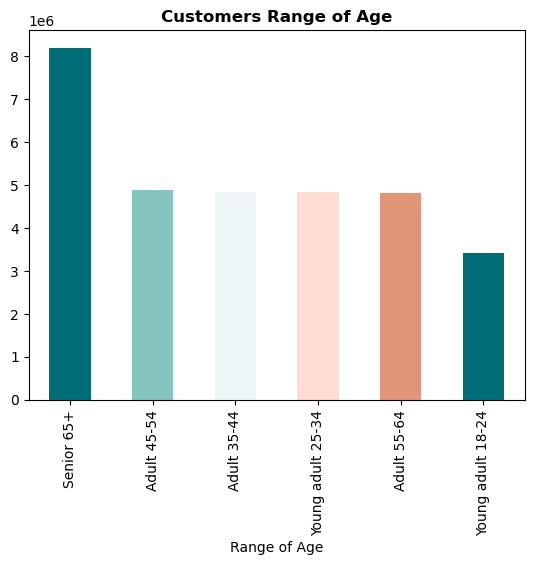

In [49]:
# customers based on age

bars_customer_by_age = orders_products_all['age_range'].value_counts().plot.bar(color = ['#006d77', '#83c5be', '#edf6f9', '#ffddd2', '#e29578'])
plt.title('Customers Range of Age', fontweight = 'bold')
plt.xlabel("Range of Age")

Text(0.5, 0, 'Range of Income')

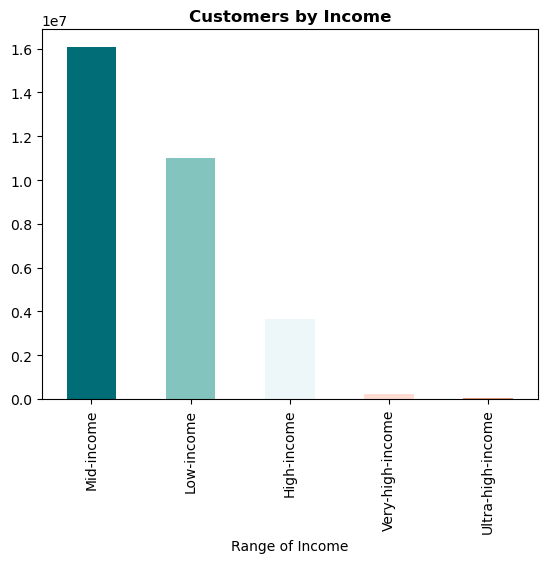

In [50]:
# Customers based on income

bars_customer_by_income = orders_products_all['income_range'].value_counts().plot.bar(color = ['#006d77', '#83c5be', '#edf6f9', '#ffddd2', '#e29578'])
plt.title('Customers by Income', fontweight = 'bold')
plt.xlabel("Range of Income")

Text(0.5, 0, 'Number of Dependants')

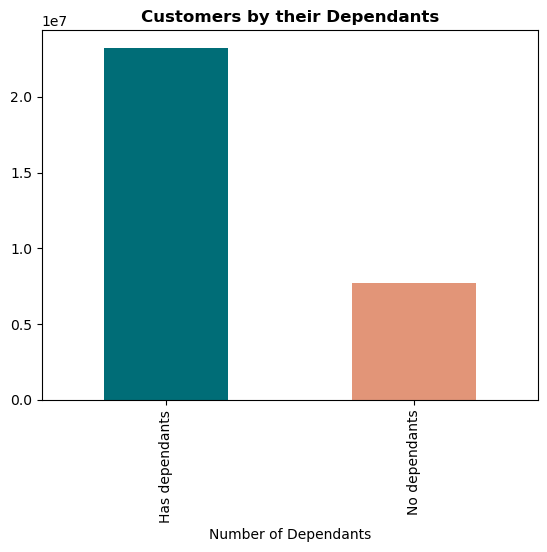

In [51]:
# Customers by their dependants

bars_customer_by_dependants = orders_products_all['dependants_flag'].value_counts().plot.bar(color = ['#006d77', '#e29578'])
plt.title('Customers by their Dependants', fontweight = 'bold')
plt.xlabel("Number of Dependants")

Text(0.5, 0, 'Day of the Week')

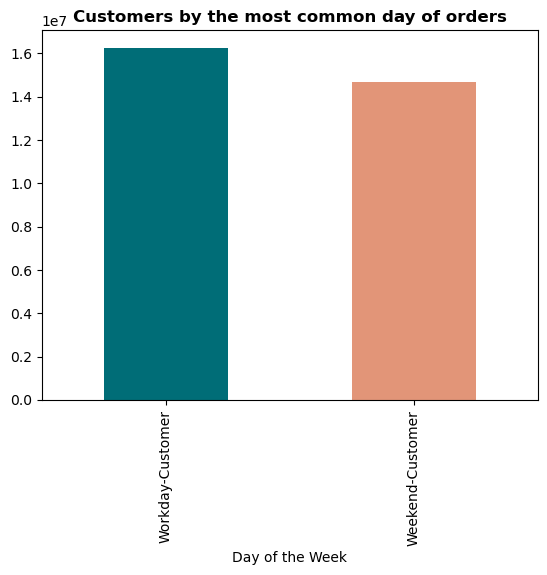

In [52]:
# Customers by the most common day of orders

bars_customer_by_day = orders_products_all['most_common_order_day'].value_counts().plot.bar(color = ['#006d77', '#e29578'])
plt.title('Customers by the most common day of orders', fontweight = 'bold')
plt.xlabel("Day of the Week")

Text(0.5, 0, 'Hour of the Day')

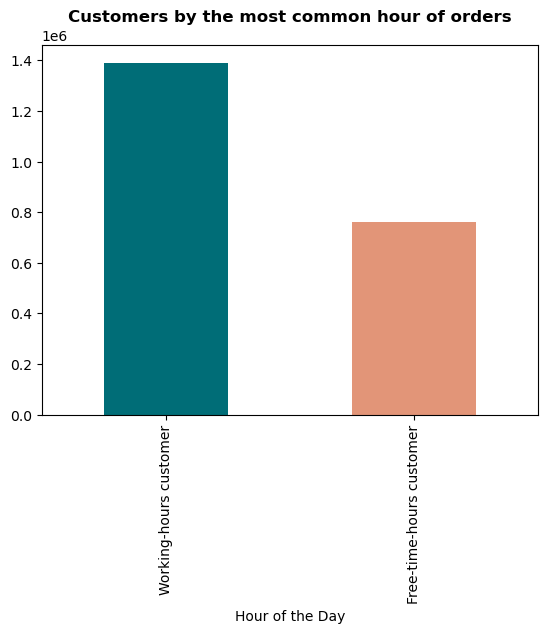

In [53]:
# Customers by the most common hour of orders

bars_customer_by_hour = orders_products_all['most_common_order_hour'].value_counts().plot.bar(color = ['#006d77', '#e29578'])
plt.title('Customers by the most common hour of orders', fontweight = 'bold')
plt.xlabel("Hour of the Day")

## Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [54]:
#Frequency

orders_products_all['regularity'] = orders_products_all.groupby(['user_id'])['days_since_prior_order'].transform(np.median)

In [55]:
orders_products_all.groupby('income_range').agg({'regularity': ['mean', 'min', 'max']})

regularity           
                        mean  min   max
income_range                           
High-income         9.842675  0.0  30.0
Low-income         10.078113  0.0  30.0
Mid-income          9.915205  0.0  30.0
Ultra-high-income   9.251894  1.0  30.0
Very-high-income    8.980342  1.0  30.0

In [56]:
# Expenditure

orders_products_all['average_spending'] = orders_products_all.groupby(['user_id'])['prices'].transform(np.mean)

In [57]:
orders_products_all.groupby('income_range').agg({'average_spending': ['mean', 'min', 'max']})

average_spending                     
                              mean       min        max
income_range                                           
High-income               7.951982  4.433333  20.114286
Low-income                7.492054  1.000000  15.000000
Mid-income                7.958287  4.656522  19.400000
Ultra-high-income         7.737645  6.270930  10.321429
Very-high-income          7.786541  4.370588  10.548876

## Compare customer profiles with regions and departments

In [58]:
departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [59]:
departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [60]:
orders_products_all.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'loyalty_flag',
       'spending_flag', 'frequency_flag', 'Gender', 'State', 'Age',
       'date_joined', 'n_dependants', 'familial_status', 'income', '_merge',
       'region', 'max_order', 'activity_flag', 'age_range', 'income_range',
       'dependants_flag', 'mode_day', 'most_common_order_day', 'mode_hour',
       'most_common_order_hour', 'regularity', 'average_spending'],
      dtype='object')

In [61]:
# Map department id to department names

department_mapping = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'
}

In [62]:
# Create a new column "department" based on the mapping

orders_products_all['department'] = orders_products_all['department_id'].map(department_mapping)

In [63]:
orders_products_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age_range,income_range,dependants_flag,mode_day,most_common_order_day,mode_hour,most_common_order_hour,regularity,average_spending,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Young adult 25-34,Low-income,Has dependants,4,Workday-Customer,7,Free-time-hours customer,20.5,6.367797,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Young adult 25-34,Low-income,Has dependants,4,Workday-Customer,7,Free-time-hours customer,20.5,6.367797,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Young adult 25-34,Low-income,Has dependants,4,Workday-Customer,7,Free-time-hours customer,20.5,6.367797,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Young adult 25-34,Low-income,Has dependants,4,Workday-Customer,7,Free-time-hours customer,20.5,6.367797,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Young adult 25-34,Low-income,Has dependants,4,Workday-Customer,7,Free-time-hours customer,20.5,6.367797,beverages


In [64]:
# Crossing the the variables 'region' and 'age_range'

regional_age_distribution = orders_products_all[['region', 'age_range']].value_counts()

In [65]:
# Converting the Series into a DataFrame for further analyses

regional_age_distribution_df = regional_age_distribution.reset_index(name='count')

In [66]:
regional_age_distribution_df

,region,age_range,count
0,South,Senior 65+,2708539
1,West,Senior 65+,2098291
2,Midwest,Senior 65+,1904119
3,South,Adult 35-44,1639323
4,South,Adult 55-64,1607174
5,South,Young adult 25-34,1603383
6,South,Adult 45-54,1587929
7,Northeast,Senior 65+,1484857
8,West,Adult 45-54,1269261
9,West,Adult 55-64,1241824


Text(0, 0.5, 'Count')

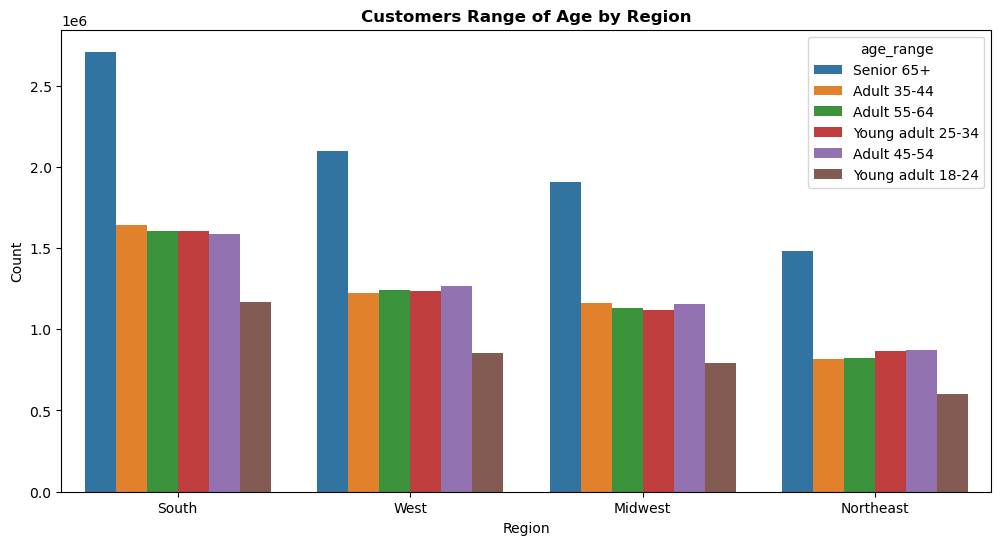

In [67]:
# Customers Range of Age by Region

plt.figure(figsize=(12, 6))
bar_regional_age_distribution = sns.barplot(data = regional_age_distribution_df, x='region', y='count', hue='age_range')
plt.title('Customers Range of Age by Region', fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Count')

In [68]:
# Crossing the variables 'region' and 'dependants_flag'

regional_dependants_situation = orders_products_all[['region', 'dependants_flag']].value_counts()

In [69]:
# Converting the Series into a DataFrame for further analyses

regional_dependants_situation_df = regional_dependants_situation.reset_index(name='count')

In [70]:
regional_dependants_situation_df

,region,dependants_flag,count
0,South,Has dependants,7729495
1,West,Has dependants,5946973
2,Midwest,Has dependants,5438873
3,Northeast,Has dependants,4110329
4,South,No dependants,2582036
5,West,No dependants,1980540
6,Midwest,No dependants,1822890
7,Northeast,No dependants,1354550


Text(0, 0.5, 'Count')

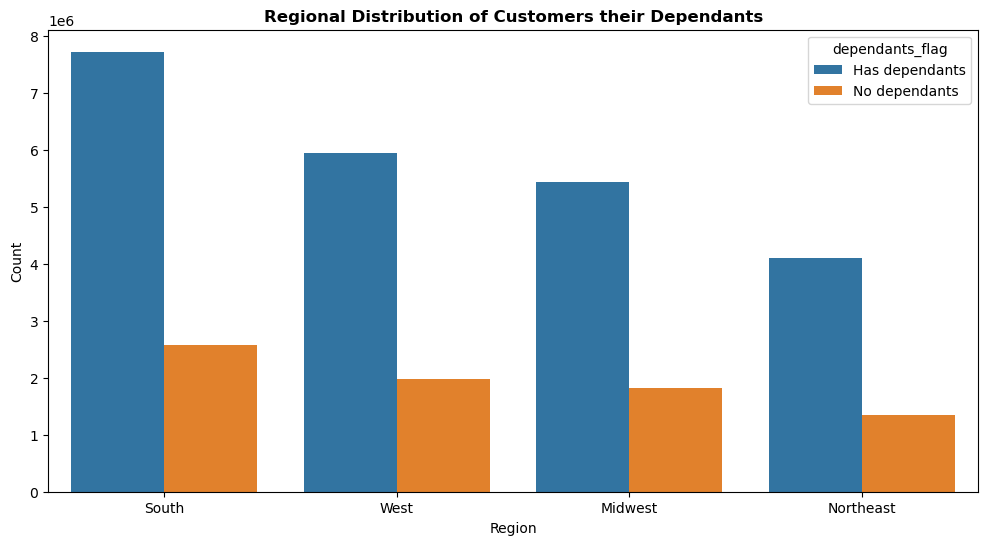

In [71]:
# Customers by their Dependants by Region

plt.figure(figsize=(12, 6))
bar_regional_dependants_situation = sns.barplot(data = regional_dependants_situation_df, x='region', y='count', hue='dependants_flag')
plt.title('Regional Distribution of Customers their Dependants', fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Count')

In [72]:
# Crossing the the variables 'region' and 'department'

regional_department_distribution = orders_products_all[['region', 'department']].value_counts()

In [73]:
# Series into a DataFrame for further analyses

regional_department_distribution_df = regional_department_distribution.reset_index(name='count')

In [74]:
# Sort the values first

regional_department_distribution_df_sorted = regional_department_distribution_df.sort_values(by=['region', 'count'], ascending=[True, False])

In [75]:
# Group by 'region' and get the top 3 for each region

top_departments_by_region = regional_department_distribution_df_sorted.groupby('region').head(3).reset_index(drop=True)

Text(0, 0.5, 'Count')

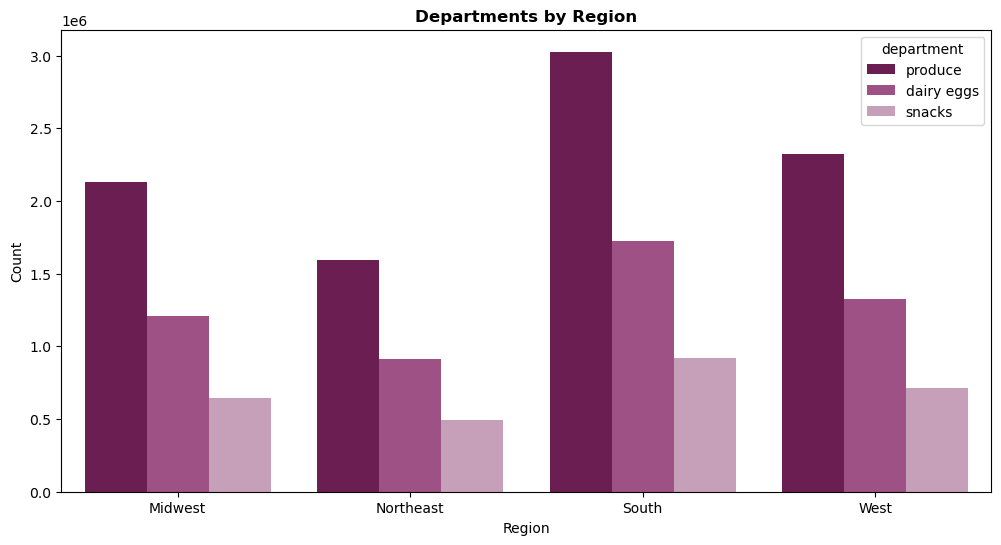

In [76]:
# Departments by Region

plt.figure(figsize=(12, 6))
bar_regional_department_distribution = sns.barplot(data = top_departments_by_region, x='region', y='count', hue='department', palette=["#771155", "#AA4488", "#CC99BB"])
plt.title('Departments by Region', fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Count')

Text(0.5, 0, 'Departments')

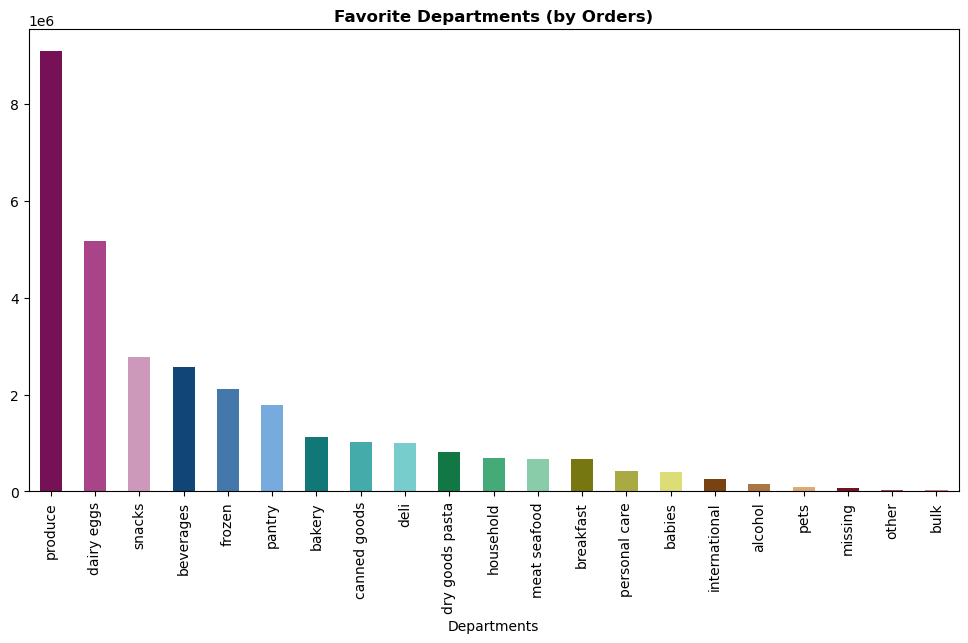

In [77]:
# Departments by Orders

plt.figure(figsize=(12, 6))
bar_departments = orders_products_all['department'].value_counts().plot.bar(color = ["#771155", "#AA4488", "#CC99BB", "#114477", "#4477AA", "#77AADD", "#117777", "#44AAAA", "#77CCCC", "#117744", "#44AA77", "#88CCAA", "#777711", "#AAAA44", "#DDDD77", "#774411", "#AA7744", "#DDAA77", "#771122", "#AA4455", "#DD7788"])
plt.title('Favorite Departments (by Orders)', fontweight = 'bold')
plt.xlabel("Departments")

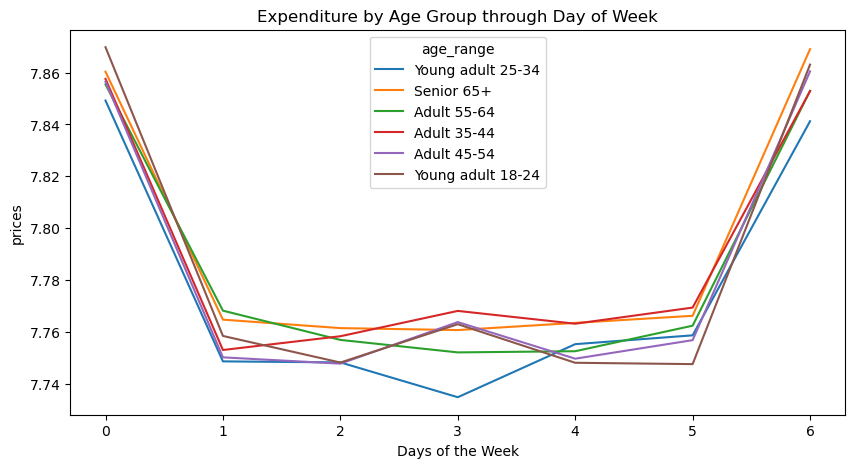

In [78]:
# Line chart for expenditure by age groups through the week

plt.figure(figsize = (10, 5))
line_age_week = sns.lineplot(data = orders_products_all, 
             x = 'orders_day_of_week', 
             y = 'prices', 
             hue = 'age_range', 
             errorbar = None
            )
plt.title("Expenditure by Age Group through Day of Week")
plt.xlabel("Days of the Week")
plt.show()

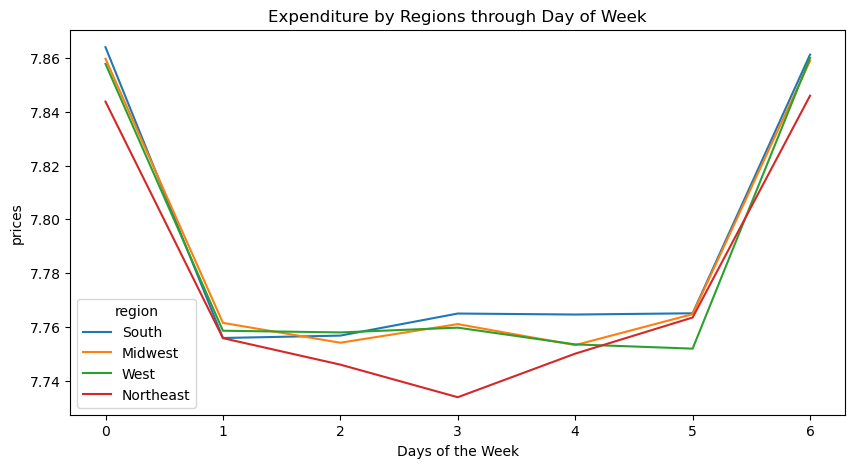

In [79]:
# Line chart for expenditure by regions through the week

plt.figure(figsize = (10, 5))
line_region_week = sns.lineplot(data = orders_products_all, 
             x = 'orders_day_of_week', 
             y = 'prices', 
             hue = 'region', 
             errorbar = None
            )
plt.title("Expenditure by Regions through Day of Week")
plt.xlabel("Days of the Week")
plt.show()

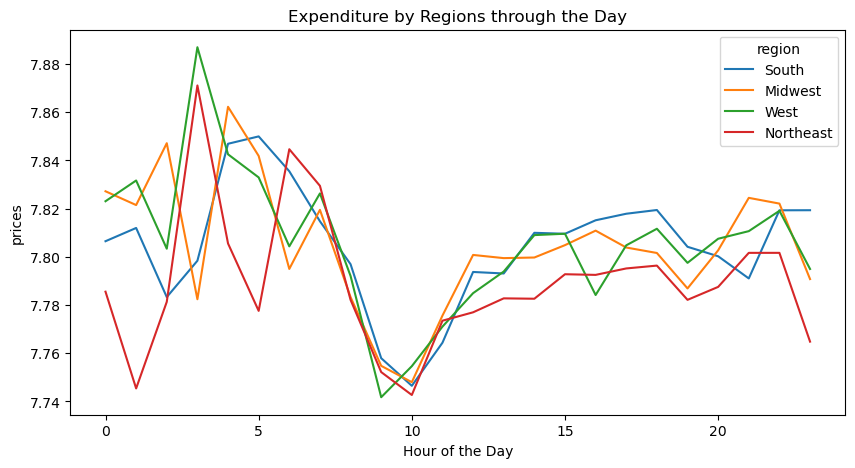

In [80]:
# Line chart for expenditure by region through the day

plt.figure(figsize = (10, 5))
line_region_hour = sns.lineplot(data = orders_products_all, 
             x = 'order_hour_of_day', 
             y = 'prices', 
             hue = 'region', 
             errorbar = None
            )
plt.title("Expenditure by Regions through the Day")
plt.xlabel("Hour of the Day")
plt.show()

## Export the visualizations

In [81]:
line_region_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_region_hour.png'))

In [82]:
line_region_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_region_week.png'))

In [83]:
line_age_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_week.png'))

In [84]:
bar_departments.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_departments.png'))

In [85]:
bar_regional_department_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regional_department_distribution.png'))

In [86]:
bar_regional_dependants_situation.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regional_dependants_situation.png'))

In [87]:
bar_regional_age_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regional_department_distribution.png'))

In [88]:
bars_customer_by_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bars_customer_by_age.png'))

In [89]:
bars_customer_by_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bars_customer_by_income.png'))

In [90]:
bars_customer_by_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bars_customer_by_dependants.png'))

In [91]:
bars_customer_by_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bars_customer_by_day.png'))

In [92]:
bars_customer_by_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bars_customer_by_hour.png'))

## Export the final data set

In [93]:
orders_products_all.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_orders_products_all.pkl'))